In [ ]:
!pip install skyfield

In [ ]:
from skyfield.api import Star, load
from skyfield.data import hipparcos
from matplotlib import pyplot as plt
plt.style.use(['dark_background'])

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)

ts = load.timescale()
t = ts.now()

eph = load('de421.bsp')
earth = eph['earth']

In [ ]:
print(f'There are {len(df)} stars in the Hipparcos catalog ({hipparcos.URL}).')
limiting_magnitude = 5.0
df_lim = df[df['magnitude'] <= limiting_magnitude]
print(f'After filtering out stars dimmer than mag {limiting_magnitude}, there are {len(df_lim)}')
bright_stars = Star.from_dataframe(df_lim)
df_lim['magnitude'].min()

There are 118218 stars in the Hipparcos catalog (https://cdsarc.u-strasbg.fr/ftp/cats/I/239/hip_main.dat).
After filtering out stars dimmer than mag 5.0, there are 1627


,magnitude,ra_degrees,dec_degrees,parallax_mas,ra_mas_per_year,dec_mas_per_year,ra_hours,epoch_year
hip,,,,,,,,
122,4.78,0.399379,-77.065294,14.77,-56.52,-176.95,0.026625,1991.25
154,4.37,0.489965,-6.013972,7.86,46.62,-41.32,0.032664,1991.25
301,4.55,0.934885,-17.335970,14.31,28.57,-7.28,0.062326,1991.25
355,4.99,1.125510,-10.509494,2.03,-6.49,-11.88,0.075034,1991.25
443,4.61,1.333941,-5.707833,25.38,-8.29,88.19,0.088929,1991.25
...,...,...,...,...,...,...,...,...
118131,4.63,359.439790,25.141479,7.54,-36.06,-32.25,23.962653,1991.25
118209,4.88,359.668377,-3.555807,14.58,-56.52,-72.34,23.977892,1991.25
118243,4.88,359.752207,55.754941,2.14,9.26,-5.09,23.983480,1991.25


/usr/local/lib/python3.6/dist-packages/skyfield/functions.py:80: RuntimeWarning: invalid value encountered in remainder
  phi = arctan2(y, x) % tau
/usr/local/lib/python3.6/dist-packages/skyfield/functions.py:80: RuntimeWarning: invalid value encountered in remainder
  phi = arctan2(y, x) % tau


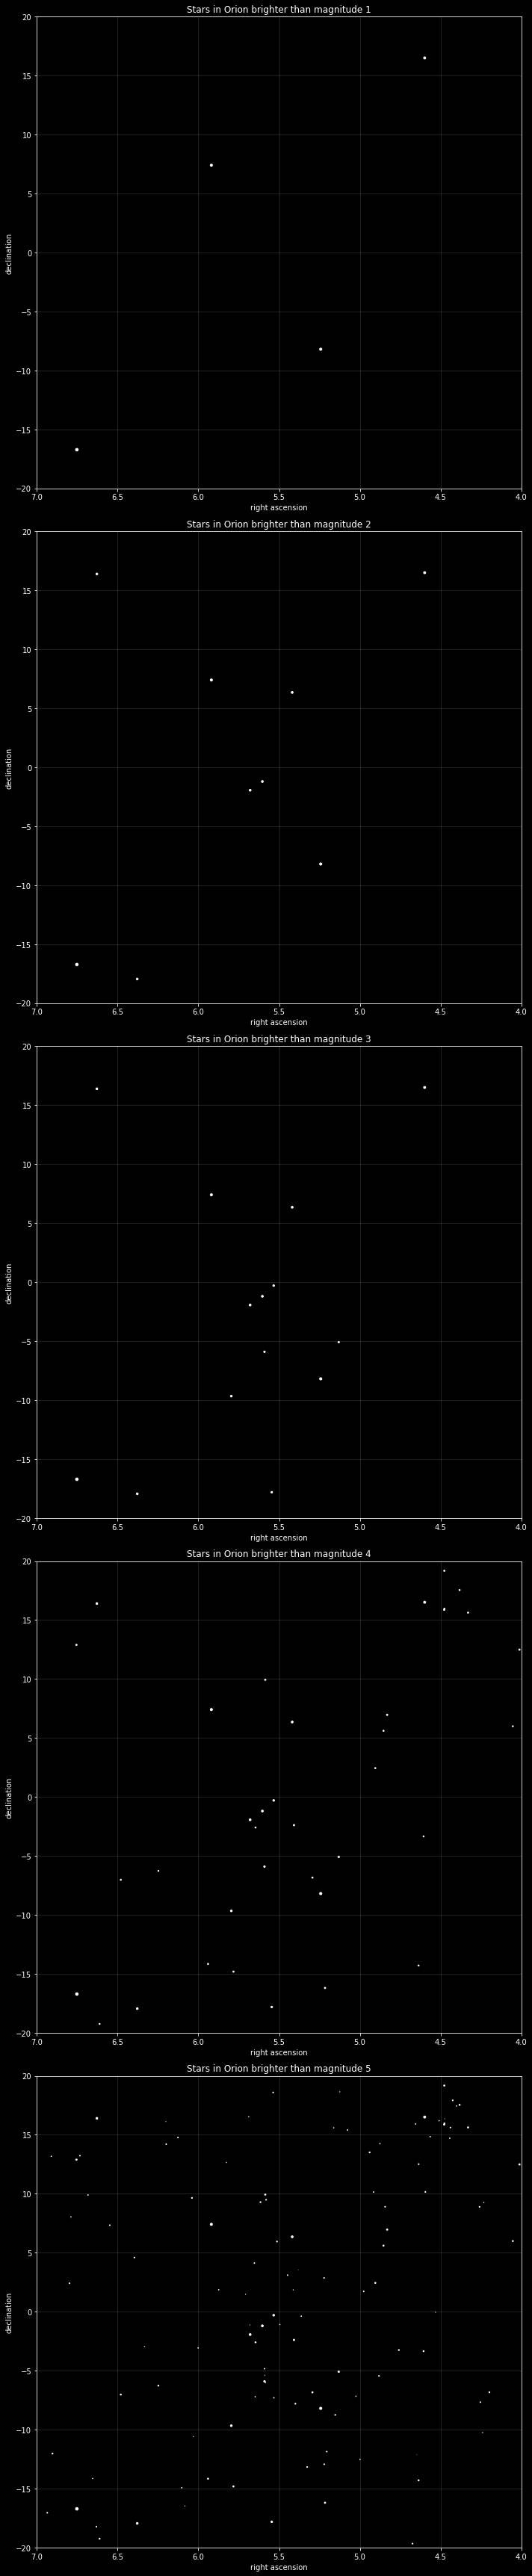

In [ ]:
fig, ax = plt.subplots(5, figsize=(10,48))
for mag in range(1,6):
  df_lim = df[df['magnitude'] <= mag]
  bright_stars = Star.from_dataframe(df_lim)
  astrometric = earth.at(t).observe(bright_stars)
  ra, dec, distance = astrometric.radec()
  ax[mag-1].scatter(ra.hours, dec.degrees, 2*(5-df_lim['magnitude']), 'w')
  ax[mag-1].set_xlim(7.0, 4.0)
  ax[mag-1].set_ylim(-20, 20)
  ax[mag-1].grid(color='gray', linestyle='-', linewidth=.5, alpha=.5)
  ax[mag-1].set(title=f'Stars in Orion brighter than magnitude {mag}')
  ax[mag-1].set_xlabel('right ascension')
  ax[mag-1].set_ylabel('declination')
plt.tight_layout()

fig.savefig(f'bright_stars_.png')